In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


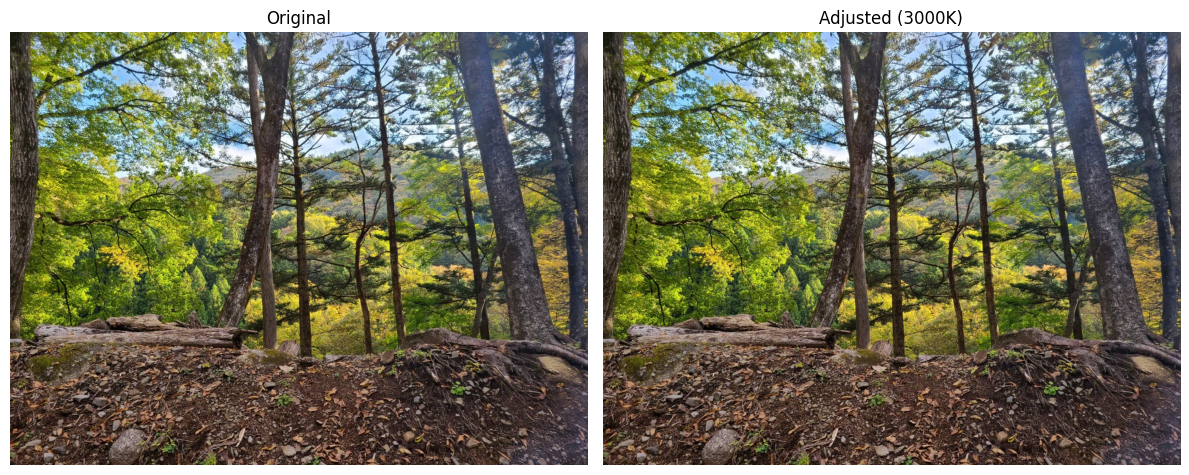

In [4]:
def adjust_color_temperature(image, kelvin):
    # ケルビンから色温度への変換
    temperature = 0
    if kelvin < 6500:
        temperature = (6500 - kelvin) / 100.0 * 8
    else:
        temperature = (kelvin - 6500) / 100.0 * -8
    
    # BGR画像をLAB色空間に変換
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # LAB色空間のBチャンネルを調整
    lab[:, :, 2] = np.clip(lab[:, :, 2] + temperature, 0, 255)
    
    # LAB画像をBGRに戻す
    result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return result

# 画像を読み込む
image = cv2.imread(r'.\1696552240584.jpg')

# 色温度を調整（例：3000Kは温かい色合い、8000Kは冷たい色合い）
adjusted_image = adjust_color_temperature(image, 6500)

# OpenCVのBGR画像をRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)

# matplotlibで結果を表示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_rgb)
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(adjusted_image_rgb)
ax2.set_title('Adjusted (3000K)')
ax2.axis('off')
plt.tight_layout()
plt.show()